In [1]:
import anndata as ad
import scanpy as sc

In [2]:
sc.settings.verbosity = 0
sc.logging.print_header()
sc.settings.set_figure_params(dpi=180)

scanpy==1.9.4 anndata==0.9.2 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==2.1.0 scikit-learn==1.3.0 statsmodels==0.14.0 igraph==0.10.8 pynndescent==0.5.10


## All Cell Merging

In [3]:
adata_orig = sc.read_h5ad("da76b084-39ac-4b59-b4e7-99e510ccc29e.h5ad")

In [4]:
adata_orig

AnnData object with n_obs × n_vars = 147137 × 22447
    obs: 'ngenes', 'libsize', 'mito_frac', 'RBP_frac', 'batch', 'donor_id', 'treatment', 'procedure', 'histo', 'cell_type_coarse', 'cell_type_fine', 'cell_type_general', 'clusters', 'cell_type_med', 'H_knn', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'is_primary_data', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'organism_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'HTAN_Biospecimen_ID', 'HTAN_Participant_ID', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'default_embedding', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'

### Normalize and reduce dimensions

In [5]:
adata = ad.AnnData(X=adata_orig.raw.X, obs=adata_orig.obs, var=adata_orig.raw.var)
adata.var['ensembl_ID'] = adata.var.index
adata.var.set_index('feature_name', inplace=True)

In [6]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5, n_top_genes=3000)

/Users/jychien/miniconda3/envs/census/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:215: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


In [7]:
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')

/Users/jychien/miniconda3/envs/census/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/Users/jychien/miniconda3/envs/census/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:842: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/Users/jychien/miniconda3/envs/census/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


## Cluster and visualize

In [8]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=50)
sc.tl.umap(adata)
sc.tl.leiden(adata)

/Users/jychien/miniconda3/envs/census/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/Users/jychien/miniconda3/envs/census/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/jychien/miniconda3/envs/census/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


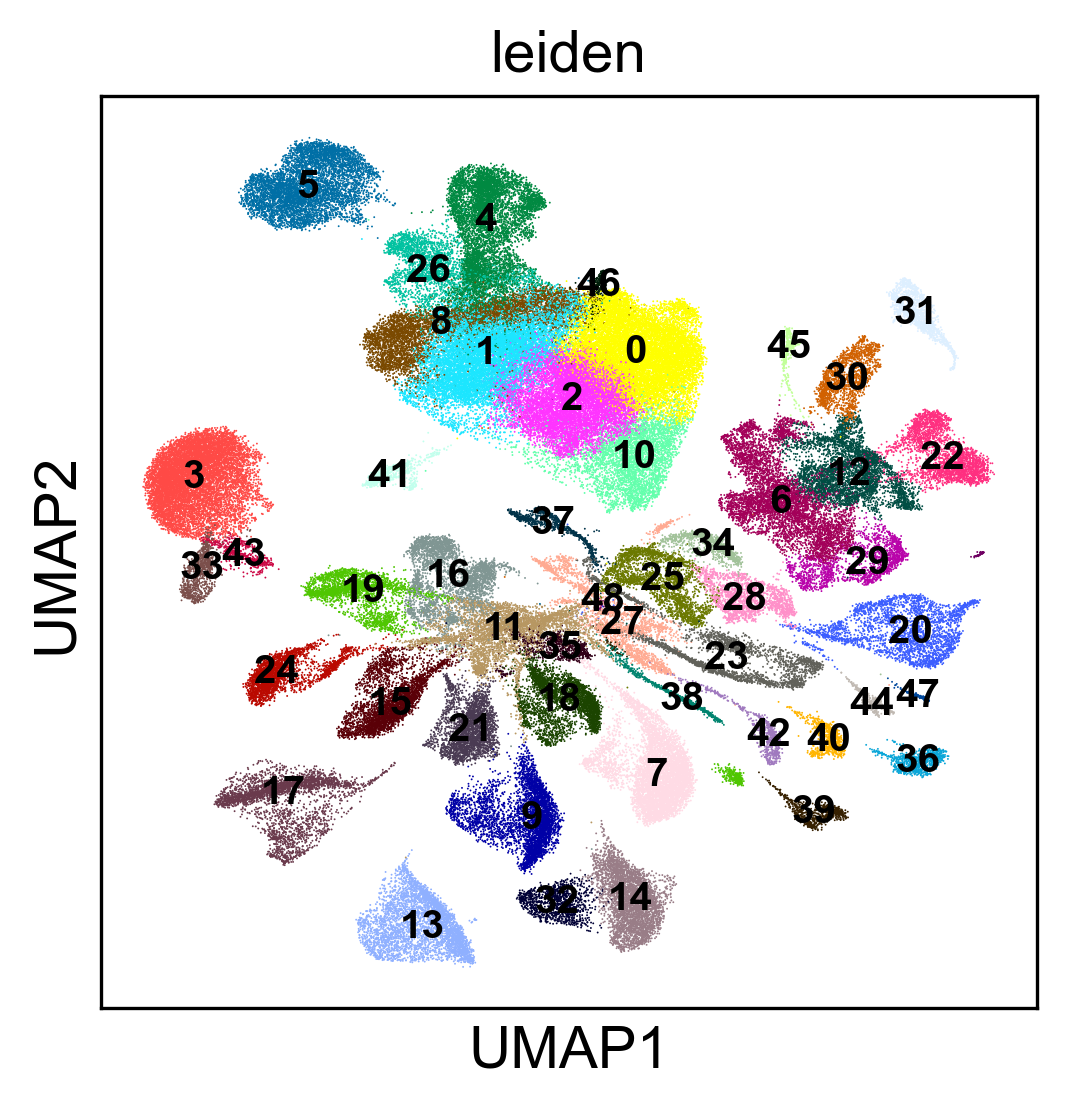

In [9]:
sc.set_figure_params(dpi=150)
sc.pl.umap(adata, color=['leiden'], legend_fontsize='x-small', legend_loc='on data')

/Users/jychien/miniconda3/envs/census/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


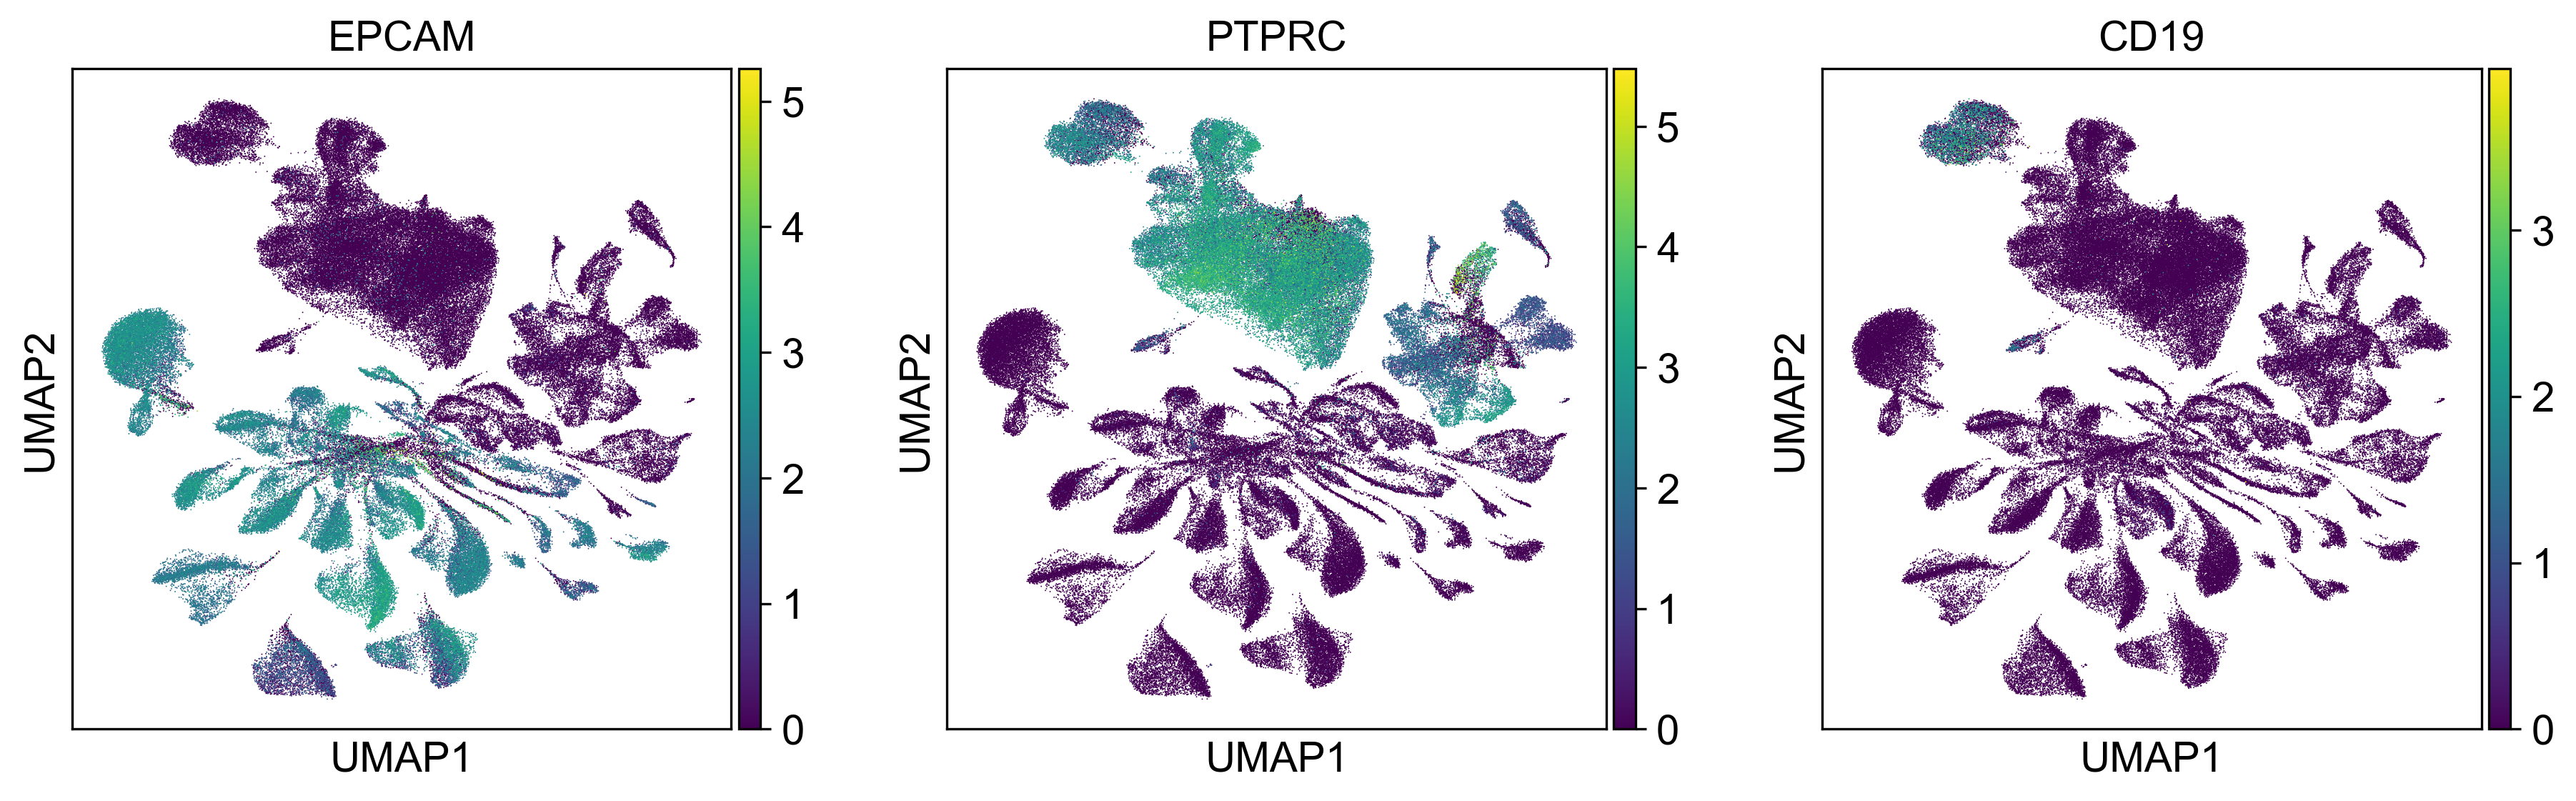

In [10]:
sc.pl.umap(adata, color=['EPCAM', 'PTPRC', 'CD19'])

/Users/jychien/miniconda3/envs/census/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/Users/jychien/miniconda3/envs/census/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/jychien/miniconda3/envs/census/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jychien/miniconda3/envs/census/lib/python3.9/site-packages/scanpy/plotting/_tools/sc

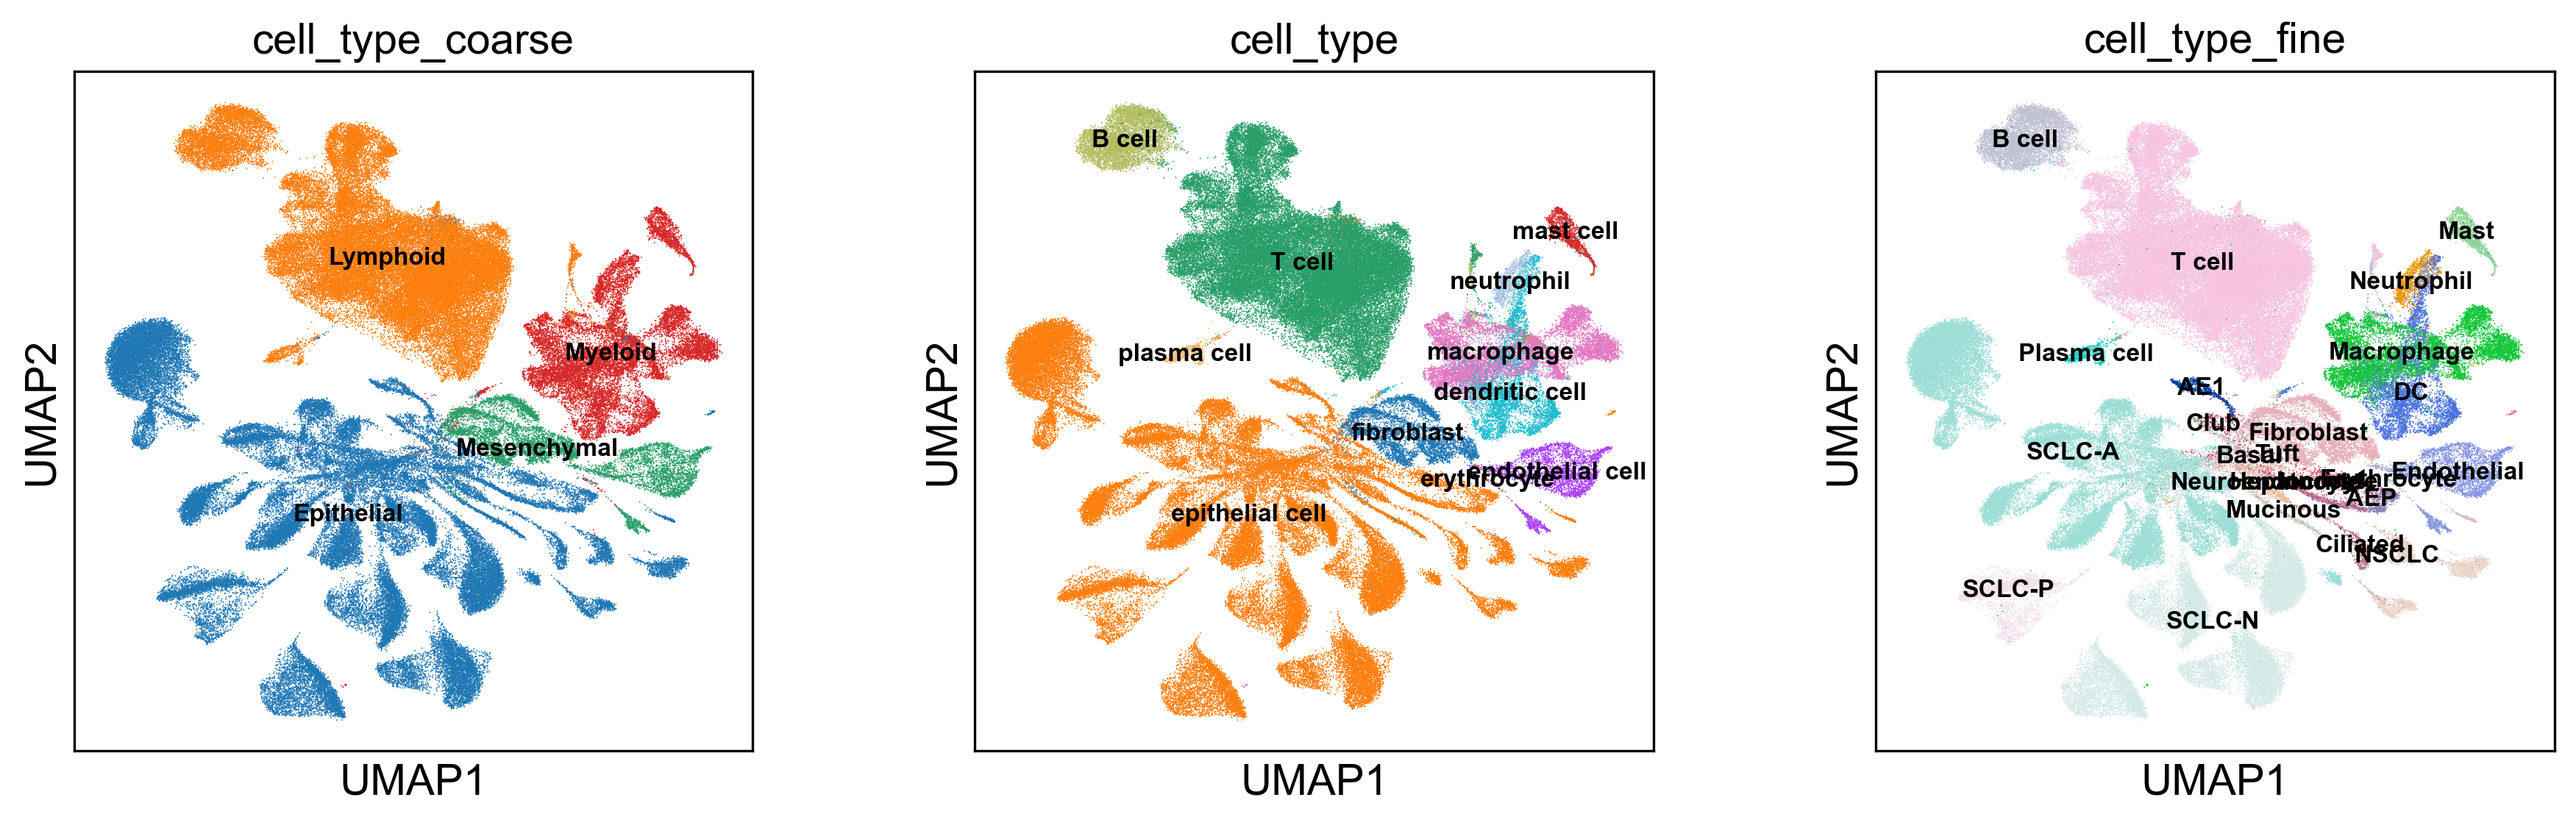

In [11]:
# Visualize author original cell type
sc.pl.umap(adata, color=['cell_type_coarse','cell_type','cell_type_fine'], legend_fontsize='xx-small', legend_loc='on data')

## Cell type persistency

In [13]:
adata.obs['cell_type'].value_counts()

cell_type
epithelial cell     64302
T cell              51848
macrophage           9251
B cell               5761
dendritic cell       4908
fibroblast           4904
endothelial cell     3078
mast cell            1267
neutrophil           1105
plasma cell           666
erythrocyte            47
Name: count, dtype: int64

In [20]:
# Assign author cell type to clusters
leiden_ct = {
    'T cell':['0','1','2','10','46','26','4','8'],
    'B cell':['5'],
    'mast cell':['31'],
    'neutrophil':['30'],
    'macrophage':['22','6'],
    'dendritic cell':['29'],
    'plasma cell':['41'],
    'endothelial cell':['20','44'],
    'fibroblast':['25','28','34'],
    'epithelial cell':['3', '7', '9', '11', '12', '13', '14', '15', '16', '17', '18', '19', '21', '23', '24', '27', '32', '33', '35', '36', '37', '38', '39', '40', '42', '43', '45']
}

In [21]:
# Look at leider clusters and see the number of cell that have a consistent author defined cell annotation
for k,v in leiden_ct.items():
    total_not_matching = 0
    print("cluster assignment: {}\t{}".format(k,v))
    for l in v:
        total_not_matching += len(adata.obs.loc[(adata.obs['leiden']==l) & (adata.obs['cell_type']!=k)])
    print("cell type persistency: {}\t{}\t{}".format(k, total_not_matching, len(adata.obs.loc[adata.obs['cell_type']==k])))
    print("-----------")

cluster assignment: T cell	['0', '1', '2', '10', '46', '26', '4', '8']
cell type persistency: T cell	205	51848
-----------
cluster assignment: B cell	['5']
cell type persistency: B cell	270	5761
-----------
cluster assignment: mast cell	['31']
cell type persistency: mast cell	57	1267
-----------
cluster assignment: neutrophil	['30']
cell type persistency: neutrophil	520	1105
-----------
cluster assignment: macrophage	['22', '6']
cell type persistency: macrophage	1863	9251
-----------
cluster assignment: dendritic cell	['29']
cell type persistency: dendritic cell	60	4908
-----------
cluster assignment: plasma cell	['41']
cell type persistency: plasma cell	41	666
-----------
cluster assignment: endothelial cell	['20', '44']
cell type persistency: endothelial cell	103	3078
-----------
cluster assignment: fibroblast	['25', '28', '34']
cell type persistency: fibroblast	168	4904
-----------
cluster assignment: epithelial cell	['3', '7', '9', '11', '12', '13', '14', '15', '16', '17', '18', '1